<a href="https://colab.research.google.com/github/ruddypp/Tugas-Akhir-Dicoding/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Rudy2nd_Ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# 2. Memuat Dataset dari Hasil Clustering
try:
    clustered_data = pd.read_csv('/content/clustered_pizza_sales.csv')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("File tidak ditemukan. Pastikan nama file benar dan berada di folder yang tepat.")

# Cek data untuk memastikan
print(clustered_data.head())

Dataset berhasil dimuat!
   pizza_id  order_id  pizza_name_id  quantity  order_date  order_time  \
0 -1.732015 -1.731453             27 -0.137141           0         414   
1 -1.731944 -1.731292             18 -0.137141           0         911   
2 -1.731873 -1.731292             20 -0.137141           0         911   
3 -1.731801 -1.731292             32 -0.137141           0         911   
4 -1.731730 -1.731292             42 -0.137141           0         911   

   unit_price  total_price  pizza_size  pizza_category  pizza_ingredients  \
0   -0.895736    -0.804866           1               1                 23   
1   -0.136435    -0.185127           1               1                 20   
2    0.553839     0.378272           0               3                 17   
3    1.175085     0.885331           0               2                  4   
4   -0.136435    -0.185127           1               3                 31   

   pizza_name  Cluster  
0          12        1  
1           7    

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# 3. Data Splitting
# Memisahkan fitur (X) dan label (y)
X = clustered_data.drop(columns=['Cluster'])  # Semua kolom kecuali kolom 'Cluster'
y = clustered_data['Cluster']  # Kolom 'Cluster' sebagai target

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data latih dan uji sudah dipisah:")
print(f"Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")

Data latih dan uji sudah dipisah:
Jumlah data latih: 34034, Jumlah data uji: 14586


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# 4a. Membangun Model Klasifikasi - Logistic Regression
model_lr = LogisticRegression(max_iter=200, random_state=42)
model_lr.fit(X_train, y_train)

# Penjelasan: Logistic Regression adalah algoritma sederhana yang cocok untuk memulai klasifikasi. Algoritma ini bekerja
# dengan memprediksi probabilitas suatu kelas berdasarkan input.

# 4a. Membangun Model Klasifikasi - Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Penjelasan: Decision Tree adalah algoritma yang mudah dipahami. Algoritma ini membuat pohon keputusan
# untuk memisahkan data ke dalam kelas-kelas berdasarkan aturan tertentu.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Logistic Regression:
Accuracy: 0.7347
F1-Score: 0.7337
Confusion Matrix:
[[2463  487 1631]
 [ 703 4631  231]
 [ 817    0 3623]]

Evaluasi Decision Tree:
Accuracy: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[4581    0    0]
 [   0 5565    0]
 [   0    0 4440]]

Perbandingan Hasil:
Logistic Regression - Accuracy: 0.7347, F1-Score: 0.7337
Decision Tree - Accuracy: 1.0000, F1-Score: 1.0000


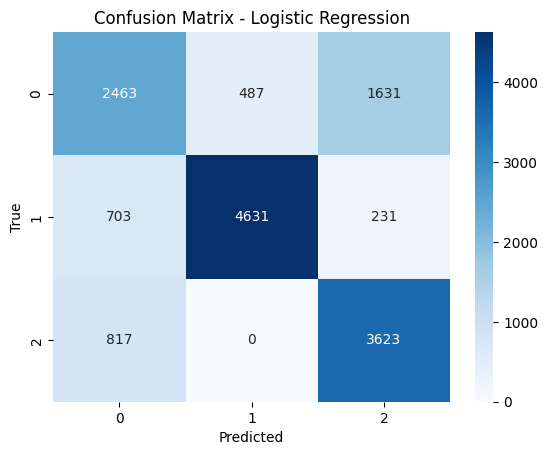

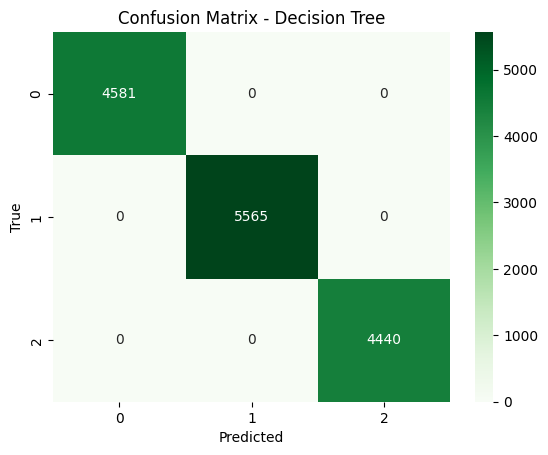

In [ ]:
# 4b. Evaluasi Model Klasifikasi
# Logistic Regression
predictions_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, predictions_lr)
f1_lr = f1_score(y_test, predictions_lr, average='weighted')

print("\nEvaluasi Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_lr))

# Decision Tree
predictions_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_dt)
f1_dt = f1_score(y_test, predictions_dt, average='weighted')

print("\nEvaluasi Decision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_dt))

# Bandingkan hasil kedua algoritma
print("\nPerbandingan Hasil:")
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, F1-Score: {f1_lr:.4f}")
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, F1-Score: {f1_dt:.4f}")

# Visualisasi Confusion Matrix untuk Logistic Regression
sns.heatmap(confusion_matrix(y_test, predictions_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualisasi Confusion Matrix untuk Decision Tree
sns.heatmap(confusion_matrix(y_test, predictions_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# 4c. Tuning Model Klasifikasi
from sklearn.model_selection import GridSearchCV

# Tuning Logistic Regression
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
params_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [200, 500]
}
grid_lr = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=params_lr, scoring='accuracy', cv=5)
grid_lr.fit(X_train, y_train)

# Tuning Decision Tree
params_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=params_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)

# Best models
best_lr = grid_lr.best_estimator_
best_dt = grid_dt.best_estimator_

print("\nTuning selesai. Model terbaik:")
print("Logistic Regression:", grid_lr.best_params_)
print("Decision Tree:", grid_dt.best_params_)



Tuning selesai. Model terbaik:
Logistic Regression: {'C': 1, 'max_iter': 200, 'solver': 'liblinear'}
Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# 4d. Evaluasi Model Klasifikasi setelah Tuning
# Logistic Regression
predictions_lr_tuned = best_lr.predict(X_test)
accuracy_lr_tuned = accuracy_score(y_test, predictions_lr_tuned)
f1_lr_tuned = f1_score(y_test, predictions_lr_tuned, average='weighted')

print("\nEvaluasi Logistic Regression setelah Tuning:")
print(f"Accuracy: {accuracy_lr_tuned:.4f}")
print(f"F1-Score: {f1_lr_tuned:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_lr_tuned))

# Decision Tree
predictions_dt_tuned = best_dt.predict(X_test)
accuracy_dt_tuned = accuracy_score(y_test, predictions_dt_tuned)
f1_dt_tuned = f1_score(y_test, predictions_dt_tuned, average='weighted')

print("\nEvaluasi Decision Tree setelah Tuning:")
print(f"Accuracy: {accuracy_dt_tuned:.4f}")
print(f"F1-Score: {f1_dt_tuned:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_dt_tuned))


Evaluasi Logistic Regression setelah Tuning:
Accuracy: 0.9191
F1-Score: 0.9175
Confusion Matrix:
[[3713  549  319]
 [ 312 5253    0]
 [   0    0 4440]]

Evaluasi Decision Tree setelah Tuning:
Accuracy: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[4581    0    0]
 [   0 5565    0]
 [   0    0 4440]]


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [ ]:
# 4e. Analisis Hasil Evaluasi Model Klasifikasi
print("\nAnalisis Hasil Evaluasi Model Klasifikasi:")
print("\nLogistic Regression:")
print(f"Sebelum Tuning - Accuracy: {accuracy_lr:.4f}, F1-Score: {f1_lr:.4f}")
print(f"Setelah Tuning - Accuracy: {accuracy_lr_tuned:.4f}, F1-Score: {f1_lr_tuned:.4f}")

print("\nDecision Tree:")
print(f"Sebelum Tuning - Accuracy: {accuracy_dt:.4f}, F1-Score: {f1_dt:.4f}")
print(f"Setelah Tuning - Accuracy: {accuracy_dt_tuned:.4f}, F1-Score: {f1_dt_tuned:.4f}")

# Identifikasi kelemahan model
if accuracy_lr_tuned > accuracy_lr:
    print("Logistic Regression menunjukkan peningkatan setelah tuning.")
else:
    print("Logistic Regression tidak menunjukkan peningkatan yang signifikan setelah tuning.")

if accuracy_dt_tuned > accuracy_dt:
    print("Decision Tree menunjukkan peningkatan setelah tuning.")
else:
    print("Decision Tree tidak menunjukkan peningkatan yang signifikan setelah tuning.")

print("\nRekomendasi:")
print("Jika performa model belum memuaskan, pertimbangkan untuk menambahkan lebih banyak data atau mencoba algoritma lain seperti Random Forest atau Gradient Boosting.")



Analisis Hasil Evaluasi Model Klasifikasi:

Logistic Regression:
Sebelum Tuning - Accuracy: 0.7347, F1-Score: 0.7337
Setelah Tuning - Accuracy: 0.9191, F1-Score: 0.9175

Decision Tree:
Sebelum Tuning - Accuracy: 1.0000, F1-Score: 1.0000
Setelah Tuning - Accuracy: 1.0000, F1-Score: 1.0000
Logistic Regression menunjukkan peningkatan setelah tuning.
Decision Tree tidak menunjukkan peningkatan yang signifikan setelah tuning.

Rekomendasi:
Jika performa model belum memuaskan, pertimbangkan untuk menambahkan lebih banyak data atau mencoba algoritma lain seperti Random Forest atau Gradient Boosting.


Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.